# **Step 1: Setup Google Colab & Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Step 2: Load the Netflix Dataset**

In [2]:

# Read the dataset
df = pd.read_csv("/content/netflix_titles.csv")

# Display first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Step 3: Data Cleaning & Preprocessing**

In [6]:
# Fix Chained Assignment Warning
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])
df["duration"] = df["duration"].fillna("0 min")

# Drop rows where 'country' is NaN
df.dropna(subset=["country"], inplace=True)

# Convert 'date_added' to datetime format safely
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce', dayfirst=True)

# Drop any rows where 'date_added' is NaT (optional)
df.dropna(subset=["date_added"], inplace=True)


# **Step 4: Exploratory Data Analysis (EDA)**

1. Movie & TV Show Count

<ipython-input-7-19f0be4d8058>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["type"], palette="coolwarm")


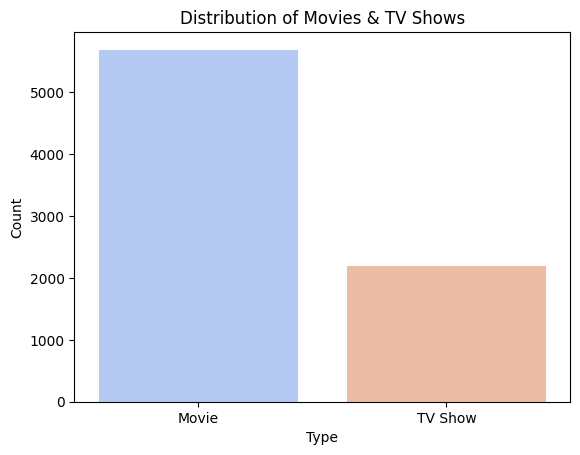

In [7]:
sns.countplot(x=df["type"], palette="coolwarm")
plt.title("Distribution of Movies & TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


 2. Top 10 Most Common Genres

<ipython-input-10-8d4ffeec90b3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(10), x="Genre", y="Count", palette="viridis")


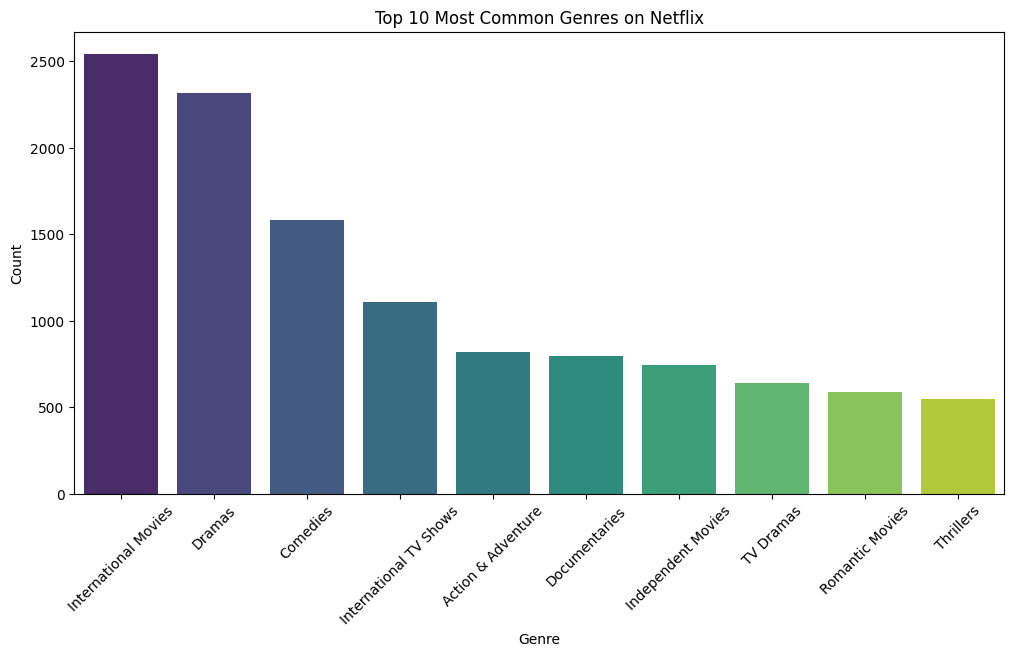

In [10]:
# Split genre values and count occurrences
from collections import Counter

genres = df["listed_in"].str.split(", ")
genre_counts = Counter([g for sublist in genres.dropna() for g in sublist])

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df.head(10), x="Genre", y="Count", palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()


3. Country-wise Distribution of Content

<ipython-input-11-eca374a628c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")


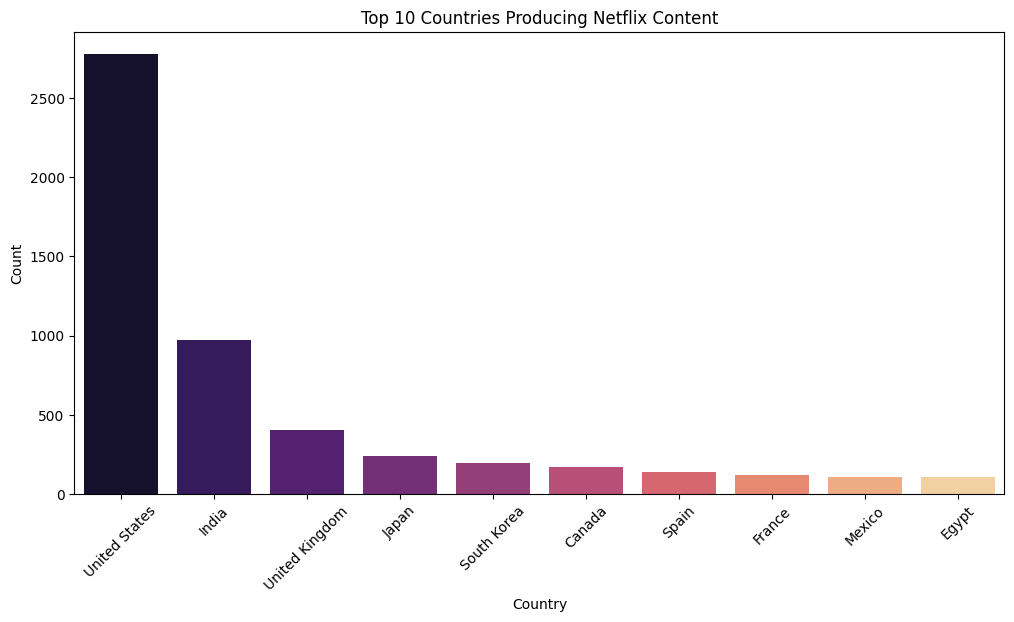

In [11]:
# Count movies per country
top_countries = df["country"].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


4. Top 10 Most Frequent Actors on Netflix

<ipython-input-12-a5c1404d6ea3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=actor_df.head(10), x="Actor", y="Count", palette="coolwarm")


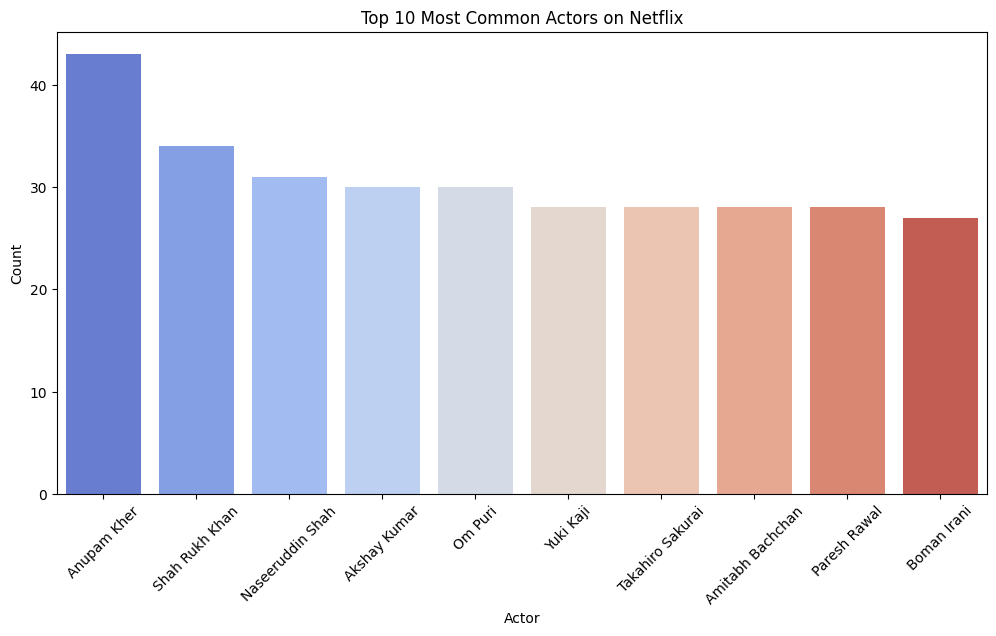

In [12]:
from collections import Counter

# Split and count actor occurrences
actors = df["cast"].dropna().str.split(", ")
actor_counts = Counter([actor.strip() for sublist in actors for actor in sublist])

# Convert to DataFrame
actor_df = pd.DataFrame(actor_counts.items(), columns=["Actor", "Count"]).sort_values(by="Count", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=actor_df.head(10), x="Actor", y="Count", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Actors on Netflix")
plt.show()


 5. Yearly Trend of Content Added on Netflix

<ipython-input-14-fa0875d3e4e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["year_added"], palette="Set2")


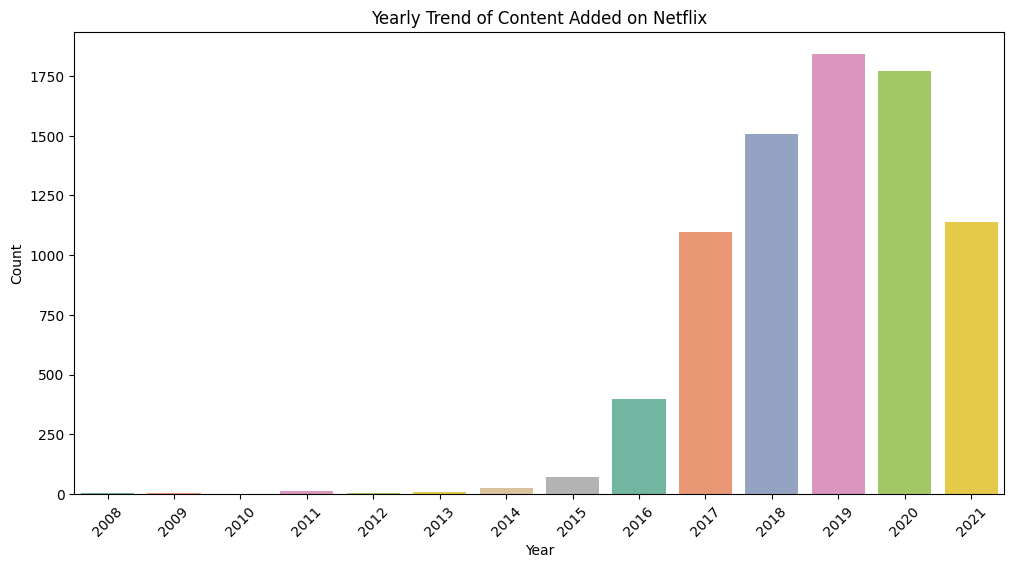

In [14]:
plt.figure(figsize=(12, 6))
df["year_added"] = df["date_added"].dt.year
sns.countplot(x=df["year_added"], palette="Set2")
plt.xticks(rotation=45)
plt.title("Yearly Trend of Content Added on Netflix")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


6. Average Movie Duration on Netflix

In [16]:
# Handle missing values explicitly
df["duration"] = df["duration"].fillna("0 min")

# Create a new column for numeric movie duration
df["movie_duration"] = df["duration"].str.extract(r'(\d+)')  # Extract numbers
df["movie_duration"] = pd.to_numeric(df["movie_duration"], errors='coerce')  # Convert to float

# Compute average duration of movies
avg_duration = df[df["type"] == "Movie"]["movie_duration"].mean()

print("Average duration of movies:", avg_duration)


Average duration of movies: 100.46758039008961


 Step 5: Compare Netflix with Amazon Prime & Disney+

<ipython-input-18-50dc6ea33c7e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="Set1")


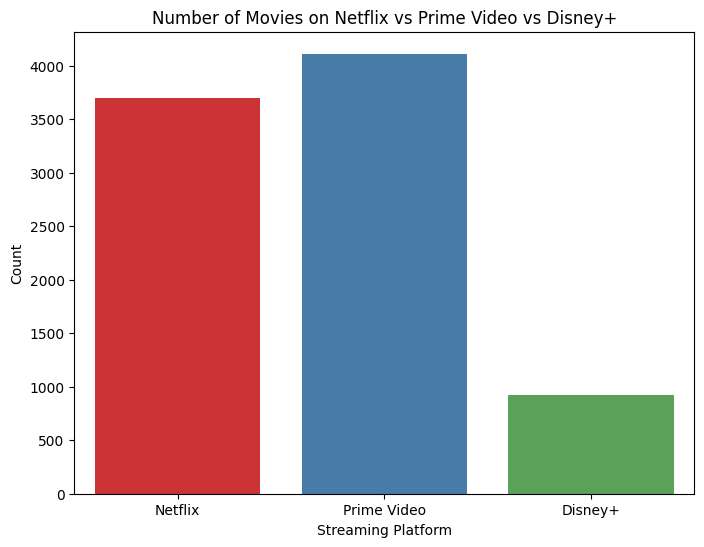

In [18]:
df_compare = pd.read_csv("/content/MoviesOnStreamingPlatforms.csv")

# Count movies on each platform
platform_counts = df_compare[["Netflix", "Prime Video", "Disney+"]].sum()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="Set1")
plt.title("Number of Movies on Netflix vs Prime Video vs Disney+")
plt.xlabel("Streaming Platform")
plt.ylabel("Count")
plt.show()
